In [28]:
import plumed
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import pandas as pd
import seaborn as sns
import matplotlib
import os
import sys 
from matplotlib import gridspec

### S5-S6_adapted-MG/MD

```
tb 0.0, te 3500580.0, dt 10.0, na 17511, nf ~ 350058 box [4.863570213317871, 0.0, 0.0, 0.0, 7.781710147857666, 0.0, 0.0, 0.0, 4.684370040893555]
```
### S5-S6_adapted-CA/MD
```
tb 0.0, te 5000000.0, dt 10.0, na 17511, nf ~ 500000 box [4.750370025634766, 0.0, 0.0, 0.0, 7.600599765777588, 0.0, 0.0, 0.0, 4.862229824066162]

```

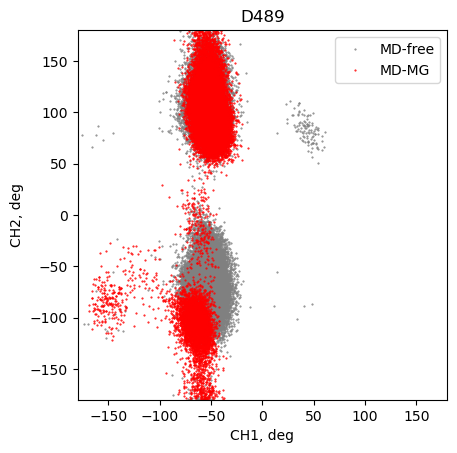

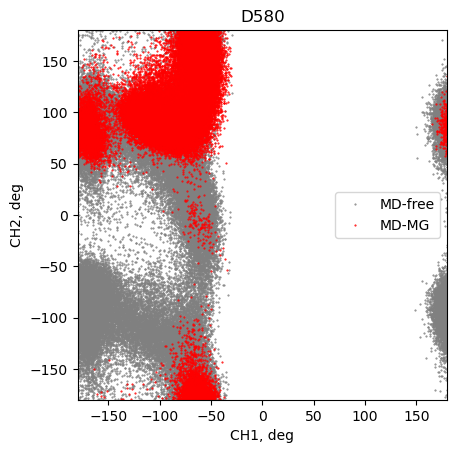

In [30]:
DT=50
FOLDERS = {'MD-MG': 'S5-S6_adapted-MG/MD', 
           'MD-free': 'S5-S6_adapted-CA/MD', 
           'MG_0.8': 'S5-S6_adapted-MG/mw_0.8', 
           'CA_0.85': 'S5-S6_adapted-CA/mw_0.85', 
           'CA_0.8': 'S5-S6_adapted-CA/mw_0.8'}

COLORS = {
    'CA_0.8': 'green',
    'CA_0.85': 'blue',
    'MG_0.8':'magenta',
    'MD-MG':'r',
    'MD-free': 'grey'

}
N_walkers = 4

window=10
RESI = [489, 580]

CH1 = {489: None, 580: None}
CH2 = {489: None, 580: None}


for i in range(len(RESI)):
    fig, ax = plt.subplots()# 1, 2, figsize = (12, 6)) 

    for sys in ['MD-free',  'MD-MG']:

        CH1[RESI[i]] = pd.read_csv(f'{FOLDERS[sys]}/dihedral/ch1_{RESI[i]}_gp t_0--1 dt_{DT}.csv', 
                            header = None, names = ['t', 'ch'])
        CH2[RESI[i]] = pd.read_csv(f'{FOLDERS[sys]}/dihedral/ch2_{RESI[i]}_gp t_0--1 dt_{DT}.csv', 
                            header = None, names = ['t', 'ch'])
        ax.plot(CH1[RESI[i]]['ch'], CH2[RESI[i]]['ch'], '.', markersize=1, label = sys, color = COLORS[sys])
    
    # ax.set_xticks(np.arange(-180, 181, 45))
    ax.set_xlim(-180, 180)
    # ax.set_yticks(np.arange(-180, 181, 45))
    ax.set_ylim(-180, 180)
    ax.set_title(f'D{RESI[i]}')
    plt.legend()
    ax.set_xlabel('CH1, deg')
    ax.set_ylabel('CH2, deg')
    ax.set_aspect('equal', 'box')
    plt.show()